# Import statements

In [29]:
from dwt import dwt_2d, idwt_2d
from dct import dct_2d, idct_2d
import numpy as np
from numpy import r_
from numpy import pi
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

%matplotlib inline
pylab.rcParams['figure.figsize'] = (20.0, 7.0)

# Read the image

In [15]:
img = np.asarray(Image.open("../assets/zelda.tif"))

In [16]:
print("Lena Image shape: ", img.shape)

Lena Image shape:  (512, 512)


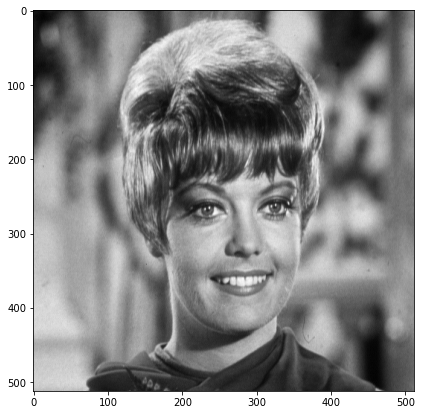

In [17]:
f = plt.figure()
plt.imshow(img,cmap='gray')

# Apply 2D_DWT

In [18]:
coeffs = dwt_2d(img, 'haar')

In [19]:
LL, (LH, HL, HH) = coeffs

In [21]:
print("LL coefficient shape: ", LL.shape)

LL coefficient shape:  (256, 256)


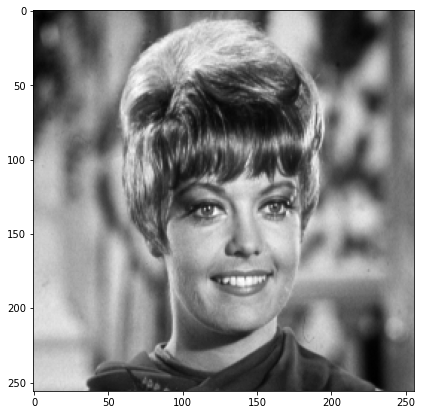

In [22]:
f = plt.figure()
plt.imshow(LL,cmap='gray')

# Apply 2D_DCT

In [27]:
img_size = LL.shape
dct_blocks = np.zeros(img_size)

# Do 8x8 DCT on image (in-place)
for i in r_[:img_size[0]:8]:
    for j in r_[:img_size[1]:8]:
        dct_blocks[i:(i+8),j:(j+8)] = dct_2d( LL[i:(i+8),j:(j+8)] )

In [28]:
print("DCT blocks shape: ", dct_blocks.shape)

DCT blocks shape:  (256, 256)


Text(0.5, 1.0, 'An 8x8 DCT block')

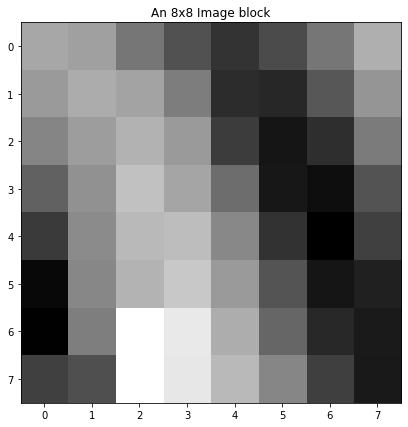

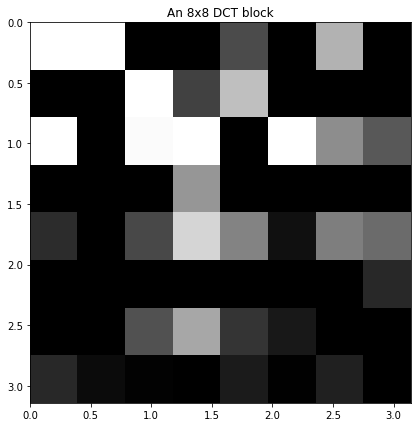

In [30]:
pos = 128

# Extract a block from image
plt.figure()
plt.imshow(LL[pos:pos+8,pos:pos+8],cmap='gray')
plt.title( "An 8x8 Image block")

# Display the dct of that block
plt.figure()
plt.imshow(dct_blocks[pos:pos+8,pos:pos+8],cmap='gray',vmax= np.max(dct_blocks)*0.01,vmin = 0, extent=[0,pi,pi,0])
plt.title( "An 8x8 DCT block")